In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import os

In [36]:
warnings.filterwarnings("ignore")

In [37]:
%matplotlib inline

# Method

Four operations
* get (load data)
* fill (fill missing values)
* sort
* group 

were compared using two libraries
* pandas
* cudf (Rapids). 

For each operation, the size of the data set was varied increasing increments of 10x 
* 10 rows
* 100 rows
.
.
.
* 100000 rows

Average processing times were computed for each library, operation, size

In [38]:
# Load Data
data = pd.read_csv("../data/perf/Performance_2000Q1.txt", sep="|", header=None, nrows=5)

# Original Data Set

In [39]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,100007365142,01/01/2000,NaN,8.0,NaN,0.0,360.0,359.0,01/2030,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100007365142,01/01/2001,NaN,8.0,74319.00,12.0,348.0,347.0,01/2030,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100007365142,01/01/2002,NaN,8.0,73635.48,24.0,336.0,335.0,01/2030,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100007365142,01/01/2003,NaN,8.0,72795.41,36.0,324.0,322.0,01/2030,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007365142,02/01/2000,NaN,8.0,NaN,1.0,359.0,358.0,01/2030,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Load Results

In [40]:
path = "../data/results"
files = os.listdir(path)
trials = [x.split('.')[0] for x in files]

datasets = {}
for i, file in enumerate(files):
    datasets[trials[i]] = pd.read_csv(path + "/" + file)

# Median operation time per trial per load

In [41]:
sorted_cols = ['get', 'fill', 'sort', 'group']
for trial, df in datasets.items():
    cols = list(df.columns)
    cols[0] = 'Operation'
    df.columns = cols
    df = df.groupby('Operation').median().T
    datasets[trial] = df[sorted_cols]

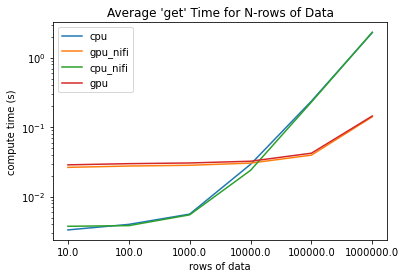

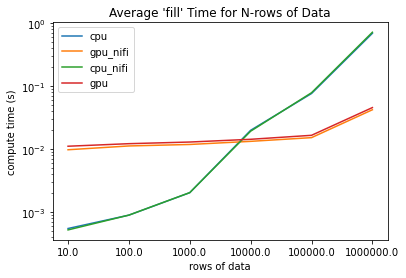

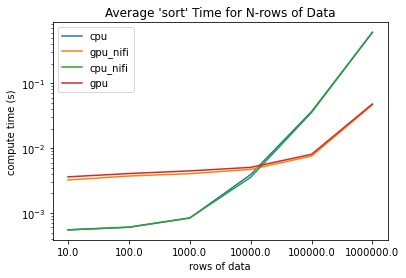

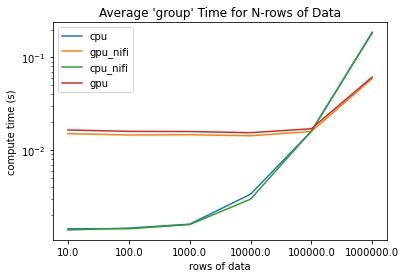

In [42]:
x = datasets['gpu'].index
for operation in sorted_cols:
    plt.yscale('log')
    for trial in trials:
        plt.plot(x, datasets[trial][operation], label = trial)
    #plt.plot(x, gpu[operation], label = 'gpu')
    #plt.plot(x, nifi[operation], label = 'nifi')
    plt.title("Average '{0}' Time for N-rows of Data".format(operation))
    plt.xlabel('rows of data')
    plt.ylabel('compute time (s)')
    plt.legend()
    plt.show()

# Result

CPU is faster for small data sets, but for about 10k rows, ~1MB, the GPU library (cudf) starts to outperform pandas. GPU is limited to 4GB memory, so larger datasets could not be loaded, while pandas has more access to system memory

In [18]:
31*10e3*4/1e6

1.24